Amabel Nabila <br>

## Identification of Problems

Problem: Knowing the majority of accidents in the US in 2016

Which US city has the highest rate of total accidents?<br>
In what month did the accidents mostly occur?<br>
What type of land is the most common in accidents?<br>
In what month is the city with the highest average number of accidents occurring?<br>
Are there any outliers in the captured land where accidents often occur data?<br>
If so, is there an average difference between the initial data and the data that has been cleared of outliers?<br>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from scipy import stats

Import the required libraries

## Data Loading & Queries

SELECT state_name,number_of_forms_submitted_for_persons_in_motor_vehicles, month_of_crash, land_use_name 
FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2016` 
LIMIT 15000;

Query coding results

In [2]:
df = pd.read_csv('2016.csv')
df

,state_name,number_of_forms_submitted_for_persons_in_motor_vehicles,month_of_crash,land_use_name
0,Arkansas,2,1,Urban
1,New York,1,1,Rural
2,Pennsylvania,1,1,Urban
3,Louisiana,4,1,Urban
4,Texas,4,1,Rural
...,...,...,...,...
14995,Michigan,2,12,Rural
14996,Michigan,4,12,Rural
14997,Minnesota,4,12,Rural
14998,Texas,4,12,Rural


Call the data

In [3]:
df.head()

,state_name,number_of_forms_submitted_for_persons_in_motor_vehicles,month_of_crash,land_use_name
0,Arkansas,2,1,Urban
1,New York,1,1,Rural
2,Pennsylvania,1,1,Urban
3,Louisiana,4,1,Urban
4,Texas,4,1,Rural


Call .head to get the top n rows of data

In [4]:
df.tail()

,state_name,number_of_forms_submitted_for_persons_in_motor_vehicles,month_of_crash,land_use_name
14995,Michigan,2,12,Rural
14996,Michigan,4,12,Rural
14997,Minnesota,4,12,Rural
14998,Texas,4,12,Rural
14999,Texas,6,12,Rural


Call .tail to retrieve the last n rows of data

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   state_name                                               15000 non-null  object
 1   number_of_forms_submitted_for_persons_in_motor_vehicles  15000 non-null  int64 
 2   month_of_crash                                           15000 non-null  int64 
 3   land_use_name                                            15000 non-null  object
dtypes: int64(2), object(2)
memory usage: 468.9+ KB


Calling .info() to see if there is a missing value and it turns out that there is no missing value because the Non-Null Count values are all the same.

In [6]:
df.rename(columns={'state_name' : 'state', 'number_of_forms_submitted_for_persons_in_motor_vehicles': 'total_crash', 'month_of_crash':'month', 'land_use_name':'land'}, inplace=True)
df.head(2)

,state,total_crash,month,land
0,Arkansas,2,1,Urban
1,New York,1,1,Rural


call .rename to rename each column and to see the changes call .head

## Data Visualization

**Which US city has the highest rate of total accidents?**

<AxesSubplot:xlabel='state'>

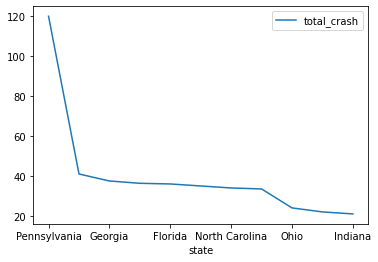

In [7]:
df[
    (df['total_crash'] >20) 
].groupby(by=['state'])[['total_crash']].mean().sort_values(by='total_crash', ascending=False).plot(kind='line')

Combine Query, Grouping, and Aggregating in one code and head() to see the  mean values in line chart by calling .plot()

Based on the line chart, the city that had the highest rate of accidents in 2016 in the US was Pennsylvania

**In what month did the accidents mostly occur?**

<AxesSubplot:ylabel='month'>

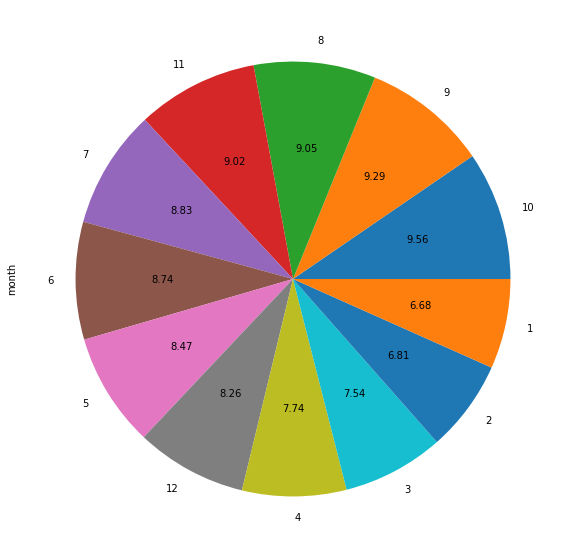

In [8]:
df['month'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f')

Call .plot() to see the highest value in pie chart 

Based on the pie chart, the majority of accidents in the US occur in the 10th month or October of 2016.

**What type of land is the most common in accidents?**

<AxesSubplot:xlabel='land,state'>

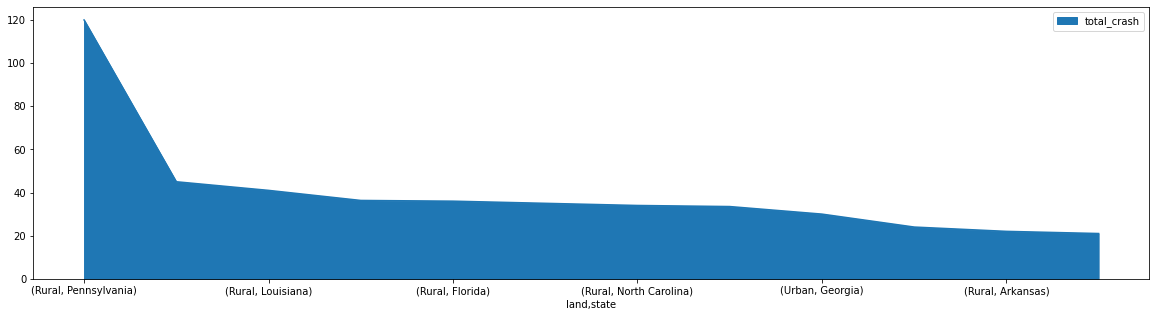

In [9]:
df[
    (df['total_crash'] >20) 
].groupby(by=['land','state'])[['total_crash']].mean().sort_values(by='total_crash', ascending=False).plot(kind='area',figsize=(20,5))

Combine Query, Grouping, and Aggregating in one code and head() to see the mean values in area by calling .plot()

The type of land in the US that often has accidents during 2016 is rural.

**In what month is the city with the highest average number of accidents occurring?**

<AxesSubplot:xlabel='state,month'>

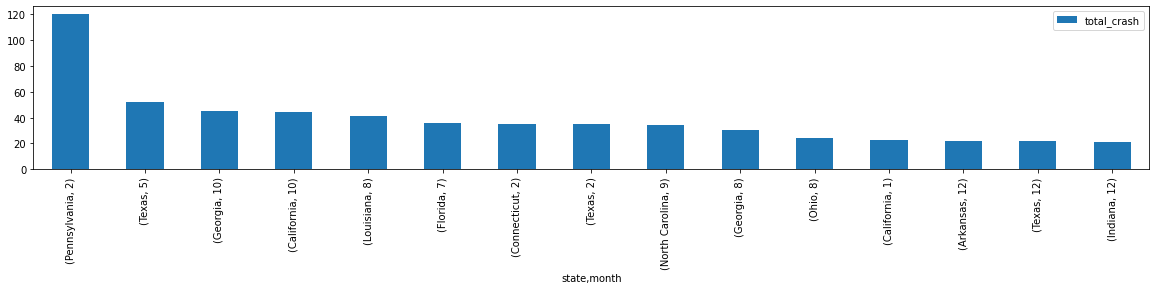

In [10]:
df[
    (df['total_crash'] >20) 
].groupby(by=['state','month'])[['total_crash']].mean().sort_values(by='total_crash', ascending=False).plot(kind='bar',figsize=(20,3))


Combine Query, Grouping, and Aggregating in one code and head() to see the mean values in bar chart by calling .plot()

Pennsylvania is the city with the highest average number of accidents in the US during 2016 which often occurs in the second month or February.

## Descriptive Statistics

**Are there any outliers in the captured land where accidents often occur data?**

In [11]:
df_awal = df.loc[(df['land']=='Rural'), 'total_crash']

Create a new variable named df_awal that contains the selected site

In [12]:
df_awal.skew()

16.796849220485285

Calls .skew() to find out whether the selected data sheet is normally distributed or skewed. Based on the results of the data above 0.5 which means the data is skewed right

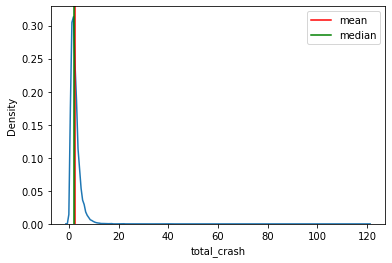

In [13]:
sns.kdeplot(df_awal)
plt.axvline(df_awal.mean(), color='r', label='mean')
plt.axvline(df_awal.median(), color='g', label='median')
plt.legend()

Calling sns for making statistical graphics from data. If it is normally distributed, then the mean and median are on one line, based on the results of the drawing, the mean and median lines are not on the same line

In [14]:
df_awal.quantile([.25, .5, .75])

0.25    1.0
0.50    2.0
0.75    3.0
Name: total_crash, dtype: float64

Call data.quantile() because EVA data is not normally distributed, then use IQR

In [15]:
Q3 = df_awal.quantile(.75)
Q1 = df_awal.quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (3*IQR)
lower = Q1 - (3*IQR)

Define the first and third quantiles and then subtract between Q3 and Q1 on the IQR variable. Then define the upper and lower.

In [16]:
upper

9.0

Calling upper to see the result

In [17]:
lower

-5.0

Calling lower to see the result

In [18]:
df_awal.isnull().sum()

0

Call isnull(). sum() to return the number of missing values in the data set

In [19]:
df_clean = df_awal[(df_awal <= upper)&
              (df_awal > 0)]

Create a new variable named df_clean to remove outliers

In [20]:
df_clean.min()

1

Calling min() to return the item with the lowest value

In [21]:
(df.shape[0] - df_clean.shape[0]) / df.shape[0] * 100

49.08

Call (df.shape[0] - df_clean.shape[0]) / df.shape[0] * 100 to see the percentage of outliers. The outlier size is 49.08%

<AxesSubplot:ylabel='total_crash'>

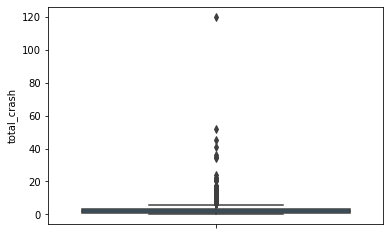

In [22]:
sns.boxplot(y = df_awal)

Calling sns.boxplot(y = df_awal) to see an overview of the data before removing the outliers. Based on the figure, it can be seen that data has been identified as an outlier as the outlier value is far from the center of the distribution compared to other values that it skews the distribution by affecting the mean.

<AxesSubplot:ylabel='total_crash'>

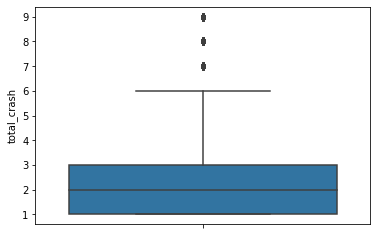

In [23]:
sns.boxplot(y = df_clean)

Calling sns.boxplot(y = df_clean) to see a picture of the data after removing the outliers. Based on the figure, it can be seen that data is more distributed but not symmetrical.

In [24]:
df_awal.describe()

count    7717.000000
mean        2.627316
std         2.531608
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       120.000000
Name: total_crash, dtype: float64

Calling df_awal.describe() to see how it compares to the cleared data

In [25]:
df_clean.describe()

count    7638.000000
mean        2.491097
std         1.578752
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: total_crash, dtype: float64

Calling df_clean.describe() to see how it compares to the data before cleaning

## Inferential Statistics

**If so, is there an average difference between the initial data and the data that has been cleared of outliers?**

The hypothesis on this case
- H0 : **average `df_clean` <= df_awal**
- H1 : **average `df_clean` > df_awal**


In [26]:
stat, p_value = ttest_1samp(df_clean, df_awal.mean())
print(stat)
print(p_value)

-7.540744220545151
5.211138626823697e-14


Calls stat, p_value = ttest_1samp(df_clean, data.mean()) to find the t statistic along with the p-value

C:\Users\Amabel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


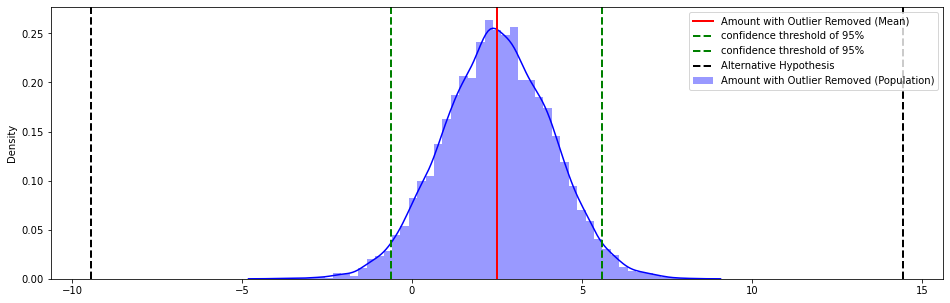

In [27]:
outlier_removed_pop = np.random.normal(df_clean.mean(), df_clean.std(), 10000)

ci = stats.norm.interval(0.95, df_clean.mean(), df_clean.std())

plt.figure(figsize=(16,5))
sns.distplot(outlier_removed_pop, label='Amount with Outlier Removed (Population)', color='blue')
plt.axvline(df_clean.mean(), color='red', linewidth=2, label='Amount with Outlier Removed (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(outlier_removed_pop.mean() + stat*outlier_removed_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(outlier_removed_pop.mean() - stat*outlier_removed_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

Eliminate outliers from the data and test hypotheses and find out if there are significant differences

Since our p-value is above than 0.05, it can be concluded that it is not successful to reject the null hypothesis

There is a difference in the df_awal (data before cleaning from outliers) with df_clean (data after cleaning from outliers)

## Conclusion

The conclusion that can be drawn from this notebook is that the city of Pennsylvania is the city that has the highest average number of accidents in the US in February 2016. The type of rural land in the city of Pennsylvania that often occurs in accidents. Besides Pennsylvania, other cities such as Louisiana and Florida are also rural land types that often experience accidents. This triggers suspicion whether the data in rural has outliers. After the data is processed, it is proven that there are outliers in the rural data. This may be due to an input error, or sampling error and the wrong subject in the initial data collection. In addition, the advice that can be given to the United States Ministry of Transportation is the possibility that if it is rural areas where accidents often occur, this could happen, perhaps damaged roads, lack of traffic markings or signs, monitoring devices or road security and other supporting facilities. This needs to be considered again, especially in the city of Pennsylvania which is prone to accidents in winter.